# Notebook showing how TS plots and mixing plots were constructed

In this notebook we create T-S plots for the DSW, northward moving water at low depths, for the Drygalski transect. We then calculate the influence of CDW and AASW on the mixing. 


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import scipy as scipy

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs

from scipy import stats
import cosima_cookbook as cc
import gsw
#plt.rcParams['text.usetex'] = False
from xhistogram.xarray import histogram
import cmocean


In [2]:
session = cc.database.create_session('/g/data/ik11/databases/ryf9091.db')

In [6]:
start_time = '2086-01-16'
end_time = '2086-01-17'
end_time2 =  '2086-01-31'

In [7]:
expt = '01deg_jra55v13_ryf9091'
variable = 'salt'
darray = cc.querying.getvar(expt,variable, session,ncfile='ocean_daily_3d_salt_01.nc', start_time=start_time, end_time=end_time, chunks={'st_ocean':None}).sel(time = slice(start_time,end_time))
variable1 = 'temp'
darray1 = cc.querying.getvar(expt,variable1, session,ncfile='ocean_daily_3d_temp_01.nc', start_time=start_time, end_time=end_time, chunks={'st_ocean':None}).sel(time = slice(start_time,end_time))
variable2 = 'pot_rho_2'
darray2 = cc.querying.getvar(expt,variable2, session,ncfile='ocean.nc', start_time=start_time, end_time=end_time2, chunks={'st_ocean':None}).sel(time = slice(start_time,end_time2))
variable3 = 'age_global'
darray3 = cc.querying.getvar(expt,variable3, session,ncfile='ocean.nc', start_time=start_time, end_time=end_time2, chunks={'st_ocean':None}).sel(time = slice(start_time,end_time2))
variable4= 'dzt'
darray4 = cc.querying.getvar(expt,variable4, session,ncfile='ocean.nc', start_time=start_time, end_time=end_time2, chunks={'st_ocean':None}).sel(time = slice(start_time,end_time2))
variable5= 'area_t'
darray5 = cc.querying.getvar(expt,variable5, session,n=1)
variable6= 'ht'
darray6 = cc.querying.getvar(expt,variable6, session,n=1)
variable7= 'dxt'
darray7 = cc.querying.getvar(expt,variable7, session,n=1, ncfile = 'ocean_grid.nc')# ncfile = 'output675/ice/OUTPUT/iceh.2069-12.nc', start_time='2059-01-01', end_time='2059-12-31').sel(time = slice('2059-01-01','2059-12-31'))
variable8= 'dyt'
darray8 = cc.querying.getvar(expt,variable8, session,n=1, ncfile = 'ocean_grid.nc')# ncfile = 'iceh.2069-12.nc', start_time='2059-01-01', end_time='2059-12-31').sel(time = slice('2059-01-01','2059-12-31'))

combined_array = xr.merge([darray, darray1, darray2, darray3, darray4, darray5, darray6, darray7, darray8])

#combined_array = xr.merge([darray, darray1, darray2, darray3, darray4, darray5])
combined_array

<xarray.Dataset>
Dimensions:     (st_ocean: 75, time: 2, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * time        (time) object 2086-01-16 12:00:00 2086-01-17 12:00:00
  * st_ocean    (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * xt_ocean    (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean    (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    geolon_t    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    geolat_t    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
Data variables:
    salt        (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(2, 75, 2700, 3600), meta=np.ndarray>
    temp        (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(2, 75, 2700, 3600), meta=np.ndarray>
    pot_rho_2   (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(2, 75, 2700, 3600), meta=np.ndarray>
    age_global  (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(2, 75, 2700, 3600), meta=np.ndarray>
    dzt         (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(2, 75, 2700, 3600), meta=np.ndarray>
    area_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    ht          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    dxt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    dyt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>

In [8]:
start_time = '2086-01-01'
end_time = '2090-12-31'

expt = '01deg_jra55v13_ryf9091'
variable = 'salt'
darray = cc.querying.getvar(expt,variable, session,ncfile='ocean.nc', start_time=start_time, end_time=end_time, chunks={'st_ocean':None}).sel(time = slice(start_time,end_time))
variable1 = 'temp'
darray1 = cc.querying.getvar(expt,variable1, session,ncfile='ocean.nc', start_time=start_time, end_time=end_time, chunks={'st_ocean':None}).sel(time = slice(start_time,end_time))
variable2 = 'pot_rho_2'
darray2 = cc.querying.getvar(expt,variable2, session,ncfile='ocean.nc', start_time=start_time, end_time=end_time, chunks={'st_ocean':None}).sel(time = slice(start_time,end_time))
variable3 = 'age_global'
darray3 = cc.querying.getvar(expt,variable3, session,ncfile='ocean.nc', start_time=start_time, end_time=end_time, chunks={'st_ocean':None}).sel(time = slice(start_time,end_time))
variable4= 'dzt'
darray4 = cc.querying.getvar(expt,variable4, session,ncfile='ocean.nc', start_time=start_time, end_time=end_time, chunks={'st_ocean':None}).sel(time = slice(start_time,end_time))
variable5= 'area_t'
darray5 = cc.querying.getvar(expt,variable5, session,n=1)
variable6= 'ht'
darray6 = cc.querying.getvar(expt,variable6, session,n=1)
variable7= 'dxt'
darray7 = cc.querying.getvar(expt,variable7, session,n=-1, ncfile = 'ocean_grid.nc')# ncfile = 'output675/ice/OUTPUT/iceh.2069-12.nc', start_time='2059-01-01', end_time='2059-12-31').sel(time = slice('2059-01-01','2059-12-31'))
variable8= 'dyt'
darray8 = cc.querying.getvar(expt,variable8, session,n=-1, ncfile = 'ocean_grid.nc')# ncfile = 'iceh.2069-12.nc', start_time='2059-01-01', end_time='2059-12-31').sel(time = slice('2059-01-01','2059-12-31'))
# variable9= 'v'
# darray9 = cc.querying.getvar(expt,variable9, session,ncfile='ocean.nc', start_time=start_time, end_time=end_time, chunks={'st_ocean':None}).sel(time = slice(start_time,end_time))

combined_array = xr.merge([darray, darray1, darray2, darray3, darray4, darray5, darray6, darray7, darray8])

#combined_array = xr.merge([darray, darray1, darray2, darray3, darray4, darray5])
combined_array

<xarray.Dataset>
Dimensions:     (st_ocean: 75, time: 60, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * xt_ocean    (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * st_ocean    (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * yt_ocean    (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
  * time        (time) object 2086-01-16 12:00:00 ... 2090-12-16 12:00:00
    geolon_t    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    geolat_t    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
Data variables:
    salt        (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    temp        (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    pot_rho_2   (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    age_global  (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    dzt         (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    area_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    ht          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    dxt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    dyt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>

In [10]:

section = combined_array.sel(xt_ocean=slice(-200,-175)).sel(yt_ocean=slice(-78,-67))#.load()#.sel(st_ocean =slice(200,6000))
#section = combined_array.sel(xt_ocean=slice(74,78)).sel(yt_ocean=slice(-70,-65))
section = section.assign(volume = lambda section : section.dzt * section.area_t)
section = section.assign(x = lambda section : section.salt*0+section.xt_ocean)
section = section.assign(y = lambda section : section.salt*0+section.yt_ocean)
section = section.assign(z = lambda section : section.salt*0+section.st_ocean)
section = section.assign(ht1 = lambda section : section.dzt*section.ht/section.dzt)
section = section.assign(temp1 = lambda section : section.temp - 273.15)

#section = section.isel(time = 0)


In [13]:
variable9 = 'v'
darray9 = cc.querying.getvar(expt,variable9, session, ncfile='ocean.nc', start_time=start_time, end_time=end_time, chunks={'st_ocean':None}).sel(time = slice(start_time,end_time))
varray = darray9.sel(xu_ocean=slice(-200,-175)).sel(yu_ocean=slice(-78.01,-67))#.isel(time = 0)

In [14]:
varray.shape

(60, 75, 261, 250)

In [15]:
section.z.shape

(60, 75, 261, 250)

Rather than make a mask with the xu_ocean and yu_ocean variables I think it's easier to make a new dataarray of the velocity, called v2, with the xt_ocean yt_ocean grid cells. Note they are off by 0.05 degrees because the two latitides are offset but this is probably close enough for the purpose of making a mask. I tried masking xu_ocean and yu_ocean but this makes using other varibales like ht in the mask difficult.

In [17]:
da_new = xr.DataArray(varray.values, dims=['time','st_ocean','yt_ocean', 'xt_ocean'],
                           coords={'time': section.time,
                               'st_ocean': section.st_ocean,
                                   'yt_ocean':section.yt_ocean,
                                   'xt_ocean':section.xt_ocean},
                         name = 'v2')
section = xr.merge([section, da_new])

In [18]:
section

<xarray.Dataset>
Dimensions:     (st_ocean: 75, time: 60, xt_ocean: 250, yt_ocean: 261)
Coordinates:
  * xt_ocean    (xt_ocean) float64 -199.9 -199.8 -199.7 ... -175.2 -175.1 -175.0
  * st_ocean    (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * yt_ocean    (yt_ocean) float64 -77.98 -77.94 -77.9 ... -67.09 -67.04 -67.0
  * time        (time) object 2086-01-16 12:00:00 ... 2090-12-16 12:00:00
    geolon_t    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(261, 100), meta=np.ndarray>
    geolat_t    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(261, 100), meta=np.ndarray>
Data variables:
    salt        (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    temp        (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    pot_rho_2   (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    age_global  (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    dzt         (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    area_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(261, 100), meta=np.ndarray>
    ht          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(261, 100), meta=np.ndarray>
    dxt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(261, 100), meta=np.ndarray>
    dyt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(261, 100), meta=np.ndarray>
    volume      (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 100), meta=np.ndarray>
    x           (time, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    y           (time, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    z           (time, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    ht1         (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 100), meta=np.ndarray>
    temp1       (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    v2          (time, st_ocean, yt_ocean, xt_ocean) float32 nan nan ... nan nan

Making a transect

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/plot/plot.py:906: UserWarning: No contour levels were found within the data range.
  primitive = ax.contour(x, y, z, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/plot/plot.py:906: UserWarning: The following kwargs were not used 

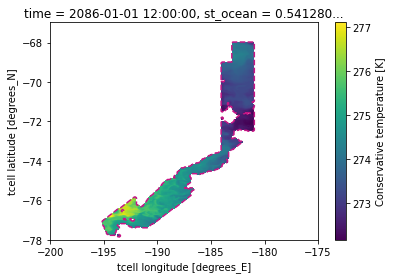

In [21]:
ds = section#.isel(xu_ocean = 100, yu_ocean = 100)
ds1 = ds
ds1 = ds1.where(ds1.z > ds1.ht-100)
ds1 = ds1.temp.mean('st_ocean')

ds2 = ds.where(ds.y > -1+0.4*ds.x).where(ds.y < 1+0.4*ds.x).where(ds.y < -72).where(ds.y < - 0.1*ds.x -91.5).where(ds.x < -183.4)#)#.where(ds.x < -188)# 
ds2 = ds2.where(ds.ht > 500)
mask_ocean2 = 2 * np.ones((ds2.dims['yt_ocean'], ds2.dims['xt_ocean'])) * np.isfinite(ds2.salt.mean('st_ocean'))  
mask_land2 = 1 * np.ones((ds2.dims['yt_ocean'], ds2.dims['xt_ocean'])) * np.isnan(ds2.salt.mean('st_ocean'))  
mask_array2 = mask_ocean2 + mask_land2
ds3 = ds.where(ds.y > -73.5).where(ds.y < -69).where(ds.x < -181 ).where(ds.x > -184)

ds3 = ds3.where(ds1 < 273.3)
ds3 = ds3.where(ds.y > -0.2+0.4*ds.x)
mask_ocean3 = 2 * np.ones((ds3.dims['yt_ocean'], ds3.dims['xt_ocean'])) * np.isfinite(ds3.salt.mean('st_ocean'))  
mask_land3 = 1 * np.ones((ds3.dims['yt_ocean'], ds3.dims['xt_ocean'])) * np.isnan(ds3.salt.mean('st_ocean'))  
mask_array3 = mask_ocean3 + mask_land3
ds4 = section
ds4 = ds4.where(ds.y > -71).where(ds.y < -68).where(ds.x <-181).where(ds.x>-183).where(ds.y > - 0.27*ds.x -120.1)
mask_ocean4 = 2 * np.ones((ds4.dims['yt_ocean'], ds4.dims['xt_ocean'])) * np.isfinite(ds4.salt.mean('st_ocean'))  
mask_land4 = 1 * np.ones((ds4.dims['yt_ocean'], ds4.dims['xt_ocean'])) * np.isnan(ds4.salt.mean('st_ocean'))  
mask_array4 = mask_ocean4 + mask_land4
mask_array = mask_ocean2 + mask_land2 + mask_ocean3 + mask_land3 +mask_ocean4 + mask_land4
mask_array.plot.contour(colors = 'mediumvioletred', centre = 3, levels = [3], linestyles='dashed')

dsm = section
dsm = dsm.where(mask_array > 3)
dsm = dsm.assign(distance = lambda dsm :-dsm.dzt*(np.sqrt(((dsm.xt_ocean + 180)*10*(5556.065+dsm.dxt)/2)**2+((dsm.yt_ocean+60)*10*(5556.065+dsm.dyt)/2)**2))/dsm.dzt+686430+8041)#.load()
#ds = ds.where(ds.z > ds.ht - 200)
dsm = dsm.assign(temp1 = lambda dsm : dsm.temp - 273.15)
#ds.distance.isel(time = 0, st_ocean = 0).plot()

# for j in np.arange(0,12,1):
#     trough = ds.where(ds.distance >-400000+(j)*50000 ).where(ds.distance <-400000+(j+1)*50000 )
#     mask_ocean = 2 * np.ones((trough.dims['yt_ocean'], trough.dims['xt_ocean'])) * np.isfinite(trough.salt.isel(time=0).mean('st_ocean'))  
#     mask_land = 1 * np.ones((trough.dims['yt_ocean'], trough.dims['xt_ocean'])) * np.isnan(trough.salt.isel(time=0).mean('st_ocean'))  
#     mask_ = mask_ocean+mask_land
#     mask_.plot.contour(colors = 'crimson', linestyles='dashed', levels = [2])
#mask_array.plot()
dsm1 = dsm.where(dsm.v2.mean('xt_ocean') >0)
#dsm1.temp.mean('xt_ocean').plot()
dsm.temp.isel(st_ocean =0).plot()
#ds.v2.isel(st_ocean =50).plot()
#ds1.plot()

Masking by meridional velocity (want >0). There are some weird features possibly because this doesn't use the pseudodistance, rather just the latitude.

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


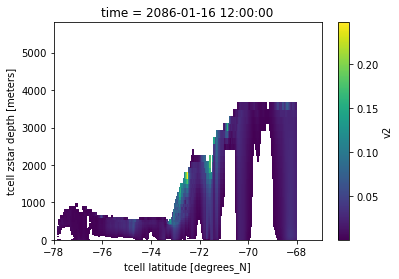

In [36]:
dsm2 = dsm1#.where(ds.z > ds.ht -500)
dsm2.v2.mean('xt_ocean').plot()

I take the average meriodional velocity across xt_ocean but in actual fact this isn't directly across the transect. Maybe that explains the bumps. So need to do another sort of distance binning here. Repeat the use of the transects from the other transects I made, except with v2 (meridional vecloity) the variable to bin over.

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return fun

Text(0, 0.5, 'velocity')

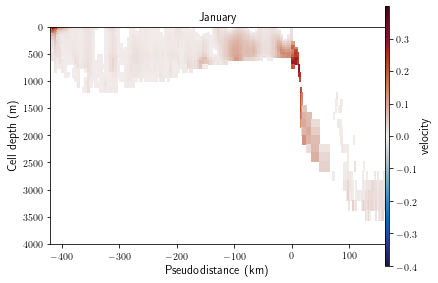

In [33]:
plt.rc('text', usetex=True)
Months = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


##SHELF##

ds = section
ds1 = ds.where(ds.z > ds.ht-100)
ds1 = ds1.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > -72).where(ds.y < -69.5).where(ds.x < -186 ).where(ds.x > -188.5)
ds = ds.where(ds1 < 95)
ds = ds.where(ds.ht > 800)
mask_ocean1 = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.salt.isel(time=0).mean('st_ocean'))  
mask_land1 = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.salt.isel(time=0).mean('st_ocean'))  

#DRYGALSKI SHELF
ds = section
ds = ds.where(ds.z > ds.ht-100)
ds1 = ds.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > 1+0.4*ds.x).where(ds.y < 4+0.4*ds.x).where(ds.y < -71).where(ds.x < -186.5)# where(ds.y < - 0.1*ds.x -92.8)
#ds = ds.where(ds1<50)
ds = ds.where(ds.ht > 500)
ds = ds.where(np.sqrt((ds.x+190)**2+(ds.y+72)**2)>1)
mask_ocean2 = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.salt.isel(time=0).mean('st_ocean'))  
mask_land2 = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.salt.isel(time=0).mean('st_ocean'))  


#DRYGALSKI CONNECTION
ds = section
ds = ds.where(ds.z > ds.ht-100)
ds1 = ds.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > 1+0.4*ds.x).where(ds.y < 4+0.4*ds.x).where(ds.y >-72.5).where(ds.y <-69).where(ds.x < -186.5)# where(ds.y < - 0.1*ds.x -92.8)
ds = ds.where(ds1<50)
ds = ds.where(ds.ht > 450)
ds = ds.where(ds.x >-187.8)
#ds.age_global.isel(time=0).mean('st_ocean').plot()
mask_ocean3 = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.salt.isel(time=0).mean('st_ocean'))  
mask_land3 = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.salt.isel(time=0).mean('st_ocean'))  

#DRYGALSKI EXTENSION
ds = section
ds = ds.where(ds.y < -68).where(ds.y>-69.75).where(ds.x>-190).where(ds.x<-187)
#ds.age_global.isel(time=0).mean('st_ocean').plot()
mask_ocean4 = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.salt.isel(time=0).mean('st_ocean'))  
mask_land4 = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.salt.isel(time=0).mean('st_ocean'))  

mask_array = mask_ocean1 + mask_land1 +mask_ocean2 + mask_land2 +mask_ocean3 + mask_land3 +mask_ocean4 + mask_land4
ds2 = section
ds2 = ds2.where(mask_array > 4).where(ds1<50).where(ds2.y < -72)
ds2 = ds2.assign(distance = lambda ds2 :(-ds2.dzt*(np.sqrt(((ds2.xt_ocean + 173)*10*(5556.065+ds2.dxt)/2)**2+((ds2.yt_ocean+60)*10*(5556.065+ds2.dyt)/2)**2))/ds2.dzt+877194)/1000)#.load()
#ds2 = ds2.where(ds2.z > ds2.ht -500)
#ds2 = ds2.where(ds2.v2.mean('xt_ocean') >0)

#OLD SHELF
# ds2 = section
# ds2 = ds2.where(ds2.y > 1+0.4*ds2.x).where(ds2.y < 4+0.4*ds2.x).where(ds2.y < -72.1).where(ds2.x < -186.5)# where(ds.y < - 0.1*ds.x -92.8)
# ds2 = ds2.where(ds2.ht > 500)
# ds2 = ds2.where(ds1<50)
# ds2 = ds2.assign(distance = lambda ds2 :-ds2.dzt*(np.sqrt(((ds2.xt_ocean + 173)*10*(5556.065+ds2.dxt)/2)**2+((ds2.yt_ocean+60)*10*(5556.065+ds2.dyt)/2)**2))/ds2.dzt+877194+4000)#.load()

distancebins_shelf = np.linspace(np.nanmin(ds2.distance.values),np.nanmax(ds2.distance.values),100)
zbins_shelf = ds2.sel(st_ocean = slice(0,5000)).st_ocean.values

##CONNECTION##
ds3 = section
ds3 = ds3.where(ds3.y > 1+0.4*ds3.x).where(ds3.y < 4+0.4*ds3.x).where(ds3.y >-72.5).where(ds3.y <-69).where(ds3.x < -186.5)# where(ds.y < - 0.1*ds.x -92.8)
ds3 = ds3.where(ds1<50)
#ds = ds.where(ds.x>-187.8)
ds3 = ds3.where(ds.ht > 450)
#ds = ds.assign(distance = lambda ds :ds.dzt*(np.sqrt((ds.xt_ocean + 200)**2+(ds.yt_ocean+98)**2))/ds.dzt)#.load()
ds3 = ds3.assign(distance = lambda ds3 :(-ds3.dzt*(np.sqrt(((ds3.xt_ocean + 187)*10*(5556.065+ds3.dxt)/2)**2+((ds3.yt_ocean+60)*10*(5556.065+ds3.dyt)/2)**2))/ds3.dzt+102000+1360+513209-12000)/1000)#.load()
#ds3 = ds3.where(ds3.v2.mean('xt_ocean') >0)
ds3 = ds3.where(ds3.z > ds3.ht -500)
distancebins_con = np.linspace(np.nanmin(ds3.distance.values),np.nanmax(ds3.distance.values), 12)
zbins_con = ds3.sel(st_ocean = slice(0,5000)).st_ocean.values

##EXTENSION##
ds4 = section
ds4 = ds4.where(ds4.y < -68).where(ds4.y>-69.75).where(ds4.x>-189).where(ds4.x<-187)
#ds = ds.assign(distance = lambda ds :ds.dzt*(np.sqrt((ds.xt_ocean + 200)**2+(ds.yt_ocean+98)**2))/ds.dzt)#.load()
ds4 = ds4.assign(distance = lambda ds4 :(-ds4.dzt*(np.sqrt(((ds4.xt_ocean + 188)*10*(5556.065+ds4.dxt)/2)**2+((ds4.yt_ocean+60)*10*(5556.065+ds4.dyt)/2)**2))/ds4.dzt+615325+8200-51396)/1000)#.load()
#ds4 = ds4.where(ds4.v2.mean('xt_ocean') >0)
ds4 = ds4.where(ds4.z > ds4.ht -500)
distancebins_ext = np.linspace(np.nanmin(ds4.distance.values),np.nanmax(ds4.distance.values),50)
zbins_ext = ds4.sel(st_ocean = slice(0,5000)).st_ocean.values

##BATHYMETRY BIT##
ds = section#.isel(time = 0)
ds1 = ds.where(ds.z > ds.ht-100)
ds1 = ds1.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > -72).where(ds.y < -69.5).where(ds.x < -186 ).where(ds.x > -188)
ds = ds.where(ds1 < 90)
ds = ds.where(ds.ht > 700)
ds = ds.assign(distance = lambda ds :(-ds.dzt*(np.sqrt(((ds.xt_ocean + 188)*10*(5556.065+ds.dxt)/2)**2+((ds.yt_ocean+60)*10*(5556.065+ds.dyt)/2)**2))/ds.dzt+615325)/1000)#.load()
ds = ds.where(ds.z > ds.ht -500)
sbins = np.linspace(0,122.136,70)
tbins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
dVol = ds.volume.where(~np.isnan(ds.volume))
hDV = histogram(ds.distance.where(~np.isnan(ds.volume)), ds.ht.where(~np.isnan(ds.volume)), bins = [sbins, tbins])#, weights = dVol)
bins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
h = histogram(hDV.ht_bin, bins=[bins], weights = hDV.distance_bin*hDV)/histogram(hDV.ht_bin, bins=[bins], weights = hDV)
p = h.values
j = np.zeros(p.size)
j[0] = p[0]
j[-1]=p[-1]
for i in np.arange(1, p.size - 1, 1):
    j[i]= np.mean(p[i-2:i+2])

htbins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
zbins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
dsi = ds.isel(time = 0)

dVol = dsi.volume.where(~np.isnan(dsi.v2))
groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.v2.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

da_new_av = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))})


ds2i = ds2.isel(time = 0)
dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
groupings_shelf_av = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.v2.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
ds4i = ds4.isel(time = 0)
dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
groupings_ext_av = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.v2.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
newcmap = cmocean.cm.balance
fig = plt.figure()
groupings_shelf_av.where(groupings_shelf_av > 0).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = -0.4, vmax = 0.4)
groupings_ext_av.where(groupings_ext_av > 0).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = -0.4, vmax = 0.4)
#groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
CS = da_new_av.where(da_new_av > 0).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = -0.4, vmax = 0.4, xlim = (-420,162), add_colorbar = False)
plt.xlabel('Pseudodistance (km)', fontsize = 12)
plt.ylabel('Cell depth (m)', fontsize = 12)
plt.title(Months[0], fontsize = 12)
cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
cbar.ax.set_ylabel('velocity', fontsize = 12)



Creating a mask from the above data, so that if there is a value it counts but if not I'll mask it out in the T and S plots:

In [34]:
mask_DSW3 = 2 * np.ones((len(da_new_av.z_bin), len(da_new_av.distance))) * np.isfinite(da_new_av.where(da_new_av > 0))  
mask_notDSW3 = 1 * np.ones((len(da_new_av.z_bin), len(da_new_av.distance))) * np.isnan(da_new_av.where(da_new_av > 0)) 
mask_DSW2 = 2 * np.ones((len(groupings_ext_av.z_bin), len(groupings_ext_av.distance_bin))) * np.isfinite(groupings_ext_av.where(groupings_ext_av > 0))  
mask_notDSW2 = 1 * np.ones((len(groupings_ext_av.z_bin), len(groupings_ext_av.distance_bin))) * np.isnan(groupings_ext_av.where(groupings_ext_av > 0)) 
mask_DSW1 = 2 * np.ones((len(groupings_shelf_av.z_bin), len(groupings_shelf_av.distance_bin))) * np.isfinite(groupings_shelf_av.where(groupings_shelf_av > 0))  
mask_notDSW1 = 1 * np.ones((len(groupings_shelf_av.z_bin), len(groupings_shelf_av.distance_bin))) * np.isnan(groupings_shelf_av.where(groupings_shelf_av > 0)) 
mask1 = mask_DSW1+mask_notDSW1
mask2 = mask_DSW2+mask_notDSW2
mask3 = mask_DSW3+mask_notDSW3


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  ret

Text(0.5, 1.0, 'Mask')

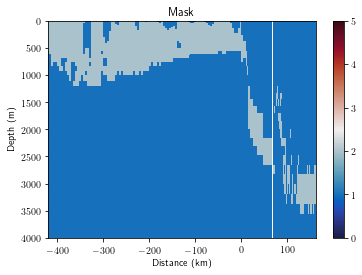

In [35]:
mask1.sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 0, vmax =5)
mask2.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 0, vmax = 5)
#groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
mask3.sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = 0, vmax = 5, xlim = (-420,162), add_colorbar = True)
plt.xlabel('Distance (km)')
plt.ylabel('Depth (m)')
plt.title('Mask')

Now we can bin by temperature and use the above mask to only show temperature of northward moving water.

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  ret

Text(0, 0.5, 'temp')

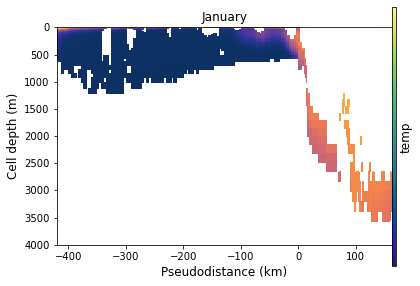

In [69]:
dVol = dsi.volume.where(~np.isnan(dsi.v2))
groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.temp.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

da_new_avtemp = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))}, name ='temp')


ds2i = ds2.isel(time = 0)
dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
groupings_shelf_avtemp = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.temp.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
ds4i = ds4.isel(time = 0)
dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
groupings_ext_avtemp = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.temp.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
newcmap = cmocean.cm.thermal
fig = plt.figure()
groupings_shelf_avtemp.where(mask1> 1).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 271, vmax = 274)
groupings_ext_avtemp.where(mask2> 1).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 271, vmax = 274)
#groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
CStemp = da_new_av.where(mask3> 1).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = 271, vmax = 274, xlim = (-420,162), add_colorbar = False)
plt.xlabel('Pseudodistance (km)', fontsize = 12)
plt.ylabel('Cell depth (m)', fontsize = 12)
plt.title(Months[0], fontsize = 12)
cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
cbar.ax.set_ylabel('temp', fontsize = 12)

Now for the annual average we repeat the above process masking by velocity and loading temperature and salinity

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return fun

0


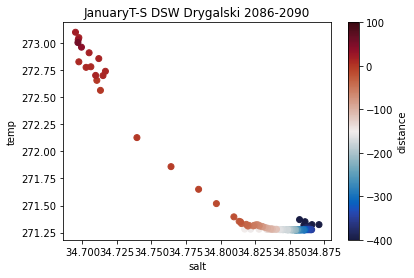

In [19]:
Months = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


##SHELF##

ds = section
ds1 = ds.where(ds.z > ds.ht-100)
ds1 = ds1.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > -72).where(ds.y < -69.5).where(ds.x < -186 ).where(ds.x > -188.5)
ds = ds.where(ds1 < 95)
ds = ds.where(ds.ht > 800)
mask_ocean1 = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.salt.isel(time=0).mean('st_ocean'))  
mask_land1 = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.salt.isel(time=0).mean('st_ocean'))  

#DRYGALSKI SHELF
ds = section
ds = ds.where(ds.z > ds.ht-100)
ds1 = ds.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > 1+0.4*ds.x).where(ds.y < 4+0.4*ds.x).where(ds.y < -71).where(ds.x < -186.5)# where(ds.y < - 0.1*ds.x -92.8)
#ds = ds.where(ds1<50)
ds = ds.where(ds.ht > 500)
ds = ds.where(np.sqrt((ds.x+190)**2+(ds.y+72)**2)>1)
mask_ocean2 = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.salt.isel(time=0).mean('st_ocean'))  
mask_land2 = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.salt.isel(time=0).mean('st_ocean'))  


#DRYGALSKI CONNECTION
ds = section
ds = ds.where(ds.z > ds.ht-100)
ds1 = ds.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > 1+0.4*ds.x).where(ds.y < 4+0.4*ds.x).where(ds.y >-72.5).where(ds.y <-69).where(ds.x < -186.5)# where(ds.y < - 0.1*ds.x -92.8)
ds = ds.where(ds1<50)
ds = ds.where(ds.ht > 450)
ds = ds.where(ds.x >-187.8)
#ds.age_global.isel(time=0).mean('st_ocean').plot()
mask_ocean3 = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.salt.isel(time=0).mean('st_ocean'))  
mask_land3 = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.salt.isel(time=0).mean('st_ocean'))  

#DRYGALSKI EXTENSION
ds = section
ds = ds.where(ds.y < -68).where(ds.y>-69.75).where(ds.x>-190).where(ds.x<-187)
#ds.age_global.isel(time=0).mean('st_ocean').plot()
mask_ocean4 = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.salt.isel(time=0).mean('st_ocean'))  
mask_land4 = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.salt.isel(time=0).mean('st_ocean'))  

mask_array = mask_ocean1 + mask_land1 +mask_ocean2 + mask_land2 +mask_ocean3 + mask_land3 +mask_ocean4 + mask_land4
ds2 = section
ds2 = ds2.where(mask_array > 4).where(ds1<50).where(ds2.y < -72)
ds2 = ds2.assign(distance = lambda ds2 :(-ds2.dzt*(np.sqrt(((ds2.xt_ocean + 173)*10*(5556.065+ds2.dxt)/2)**2+((ds2.yt_ocean+60)*10*(5556.065+ds2.dyt)/2)**2))/ds2.dzt+877194)/1000)#.load()
#ds2 = ds2.where(ds2.z > ds2.ht -500)
#ds2 = ds2.where(ds2.v2.mean('xt_ocean') >0)

#OLD SHELF
# ds2 = section
# ds2 = ds2.where(ds2.y > 1+0.4*ds2.x).where(ds2.y < 4+0.4*ds2.x).where(ds2.y < -72.1).where(ds2.x < -186.5)# where(ds.y < - 0.1*ds.x -92.8)
# ds2 = ds2.where(ds2.ht > 500)
# ds2 = ds2.where(ds1<50)
# ds2 = ds2.assign(distance = lambda ds2 :-ds2.dzt*(np.sqrt(((ds2.xt_ocean + 173)*10*(5556.065+ds2.dxt)/2)**2+((ds2.yt_ocean+60)*10*(5556.065+ds2.dyt)/2)**2))/ds2.dzt+877194+4000)#.load()

distancebins_shelf = np.linspace(np.nanmin(ds2.distance.values),np.nanmax(ds2.distance.values),100)
zbins_shelf = ds2.sel(st_ocean = slice(0,5000)).st_ocean.values

##CONNECTION##
ds3 = section
ds3 = ds3.where(ds3.y > 1+0.4*ds3.x).where(ds3.y < 4+0.4*ds3.x).where(ds3.y >-72.5).where(ds3.y <-69).where(ds3.x < -186.5)# where(ds.y < - 0.1*ds.x -92.8)
ds3 = ds3.where(ds1<50)
#ds = ds.where(ds.x>-187.8)
ds3 = ds3.where(ds.ht > 450)
#ds = ds.assign(distance = lambda ds :ds.dzt*(np.sqrt((ds.xt_ocean + 200)**2+(ds.yt_ocean+98)**2))/ds.dzt)#.load()
ds3 = ds3.assign(distance = lambda ds3 :(-ds3.dzt*(np.sqrt(((ds3.xt_ocean + 187)*10*(5556.065+ds3.dxt)/2)**2+((ds3.yt_ocean+60)*10*(5556.065+ds3.dyt)/2)**2))/ds3.dzt+102000+1360+513209-12000)/1000)#.load()
#ds3 = ds3.where(ds3.v2.mean('xt_ocean') >0)
ds3 = ds3.where(ds3.z > ds3.ht -500)
distancebins_con = np.linspace(np.nanmin(ds3.distance.values),np.nanmax(ds3.distance.values), 12)
zbins_con = ds3.sel(st_ocean = slice(0,5000)).st_ocean.values

##EXTENSION##
ds4 = section
ds4 = ds4.where(ds4.y < -68).where(ds4.y>-69.75).where(ds4.x>-189).where(ds4.x<-187)
#ds = ds.assign(distance = lambda ds :ds.dzt*(np.sqrt((ds.xt_ocean + 200)**2+(ds.yt_ocean+98)**2))/ds.dzt)#.load()
ds4 = ds4.assign(distance = lambda ds4 :(-ds4.dzt*(np.sqrt(((ds4.xt_ocean + 188)*10*(5556.065+ds4.dxt)/2)**2+((ds4.yt_ocean+60)*10*(5556.065+ds4.dyt)/2)**2))/ds4.dzt+615325+8200-51396)/1000)#.load()
#ds4 = ds4.where(ds4.v2.mean('xt_ocean') >0)
ds4 = ds4.where(ds4.z > ds4.ht -500)
distancebins_ext = np.linspace(np.nanmin(ds4.distance.values),np.nanmax(ds4.distance.values),50)
zbins_ext = ds4.sel(st_ocean = slice(0,5000)).st_ocean.values

##BATHYMETRY BIT##
ds = section#.isel(time = 0)
ds1 = ds.where(ds.z > ds.ht-100)
ds1 = ds1.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > -72).where(ds.y < -69.5).where(ds.x < -186 ).where(ds.x > -188)
ds = ds.where(ds1 < 90)
ds = ds.where(ds.ht > 700)
ds = ds.assign(distance = lambda ds :(-ds.dzt*(np.sqrt(((ds.xt_ocean + 188)*10*(5556.065+ds.dxt)/2)**2+((ds.yt_ocean+60)*10*(5556.065+ds.dyt)/2)**2))/ds.dzt+615325)/1000)#.load()
ds = ds.where(ds.z > ds.ht -500)
sbins = np.linspace(0,122.136,70)
tbins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
dVol = ds.volume.where(~np.isnan(ds.volume))
hDV = histogram(ds.distance.where(~np.isnan(ds.volume)), ds.ht.where(~np.isnan(ds.volume)), bins = [sbins, tbins])#, weights = dVol)
bins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
h = histogram(hDV.ht_bin, bins=[bins], weights = hDV.distance_bin*hDV)/histogram(hDV.ht_bin, bins=[bins], weights = hDV)
p = h.values
j = np.zeros(p.size)
j[0] = p[0]
j[-1]=p[-1]
for i in np.arange(1, p.size - 1, 1):
    j[i]= np.mean(p[i-2:i+2])

htbins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
zbins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values

for i in np.arange(1):

    #dsi = ds.isel(time = i)
    #i = 2
    dsi = ds#.isel(time = [0*12+i, 1*12+i,2*12+i,3*12+i,4*12+i])
    dVol = dsi.volume.where(~np.isnan(dsi.v2))
    groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.v2.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

    da_new_av = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))})


    ds2i = ds2#.isel(time = [0*12+i, 1*12+i,2*12+i,3*12+i,4*12+i])
    dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
    groupings_shelf_av = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.v2.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
    ds4i = ds4#.isel(time = [0*12+i, 1*12+i,2*12+i,3*12+i,4*12+i])
    dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
    groupings_ext_av = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.v2.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
#newcmap = cmocean.cm.balance
# fig = plt.figure()
# # groupings_shelf_av.where(groupings_shelf_av > 0).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = -0.4, vmax = 0.4)
# # groupings_ext_av.where(groupings_ext_av > 0).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = -0.4, vmax = 0.4)
# # #groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
# # CS = da_new_av.where(da_new_av > 0).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = -0.4, vmax = 0.4, xlim = (-420,162), add_colorbar = False)
# # # plt.xlabel('Pseudodistance (km)', fontsize = 12)
# # # plt.ylabel('Cell depth (m)', fontsize = 12)
# # # plt.title(Months[0], fontsize = 12)
# # # cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
# # # cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
# # # cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
# # # cbar.ax.set_ylabel('velocity', fontsize = 12)

    mask_DSW3 = 2 * np.ones((len(da_new_av.z_bin), len(da_new_av.distance))) * np.isfinite(da_new_av.where(da_new_av > 0))  
    mask_notDSW3 = 1 * np.ones((len(da_new_av.z_bin), len(da_new_av.distance))) * np.isnan(da_new_av.where(da_new_av > 0)) 
    mask_DSW2 = 2 * np.ones((len(groupings_ext_av.z_bin), len(groupings_ext_av.distance_bin))) * np.isfinite(groupings_ext_av.where(groupings_ext_av > 0))  
    mask_notDSW2 = 1 * np.ones((len(groupings_ext_av.z_bin), len(groupings_ext_av.distance_bin))) * np.isnan(groupings_ext_av.where(groupings_ext_av > 0)) 
    mask_DSW1 = 2 * np.ones((len(groupings_shelf_av.z_bin), len(groupings_shelf_av.distance_bin))) * np.isfinite(groupings_shelf_av.where(groupings_shelf_av > 0))  
    mask_notDSW1 = 1 * np.ones((len(groupings_shelf_av.z_bin), len(groupings_shelf_av.distance_bin))) * np.isnan(groupings_shelf_av.where(groupings_shelf_av > 0)) 
    mask1 = mask_DSW1+mask_notDSW1
    mask2 = mask_DSW2+mask_notDSW2
    mask3 = mask_DSW3+mask_notDSW3

#_____________________________________________________________________________________________________________#

    dVol = dsi.volume.where(~np.isnan(dsi.v2))
    groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.temp.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

    da_new_avtemp = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))}, name ='temp')


    ds2i = ds2#.isel(time = 0)
    dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
    groupings_shelf_avtemp = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.temp.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
    ds4i = ds4#.isel(time = 0)
    dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
    groupings_ext_avtemp = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.temp.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
    newcmap = cmocean.cm.thermal
# fig = plt.figure()
# groupings_shelf_avtemp.where(mask1> 1).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 271, vmax = 274)
# groupings_ext_avtemp.where(mask2> 1).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 271, vmax = 274)
# #groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
# CStemp = da_new_av.where(mask3> 1).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = 271, vmax = 274, xlim = (-420,162), add_colorbar = False)
# plt.xlabel('Pseudodistance (km)', fontsize = 12)
# plt.ylabel('Cell depth (m)', fontsize = 12)
# plt.title(Months[0], fontsize = 12)
# cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
# cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
# cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
# cbar.ax.set_ylabel('temp', fontsize = 12)

#_____________________________________________________________________________________________________________#

    dVol = dsi.volume.where(~np.isnan(dsi.v2))
    groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.salt.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

    da_new_avsalt = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))}, name = 'salt')


    ds2i = ds2#.isel(time = 0)
    dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
    groupings_shelf_avsalt = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.salt.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
    ds4i = ds4#.isel(time = 0)
    dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
    groupings_ext_avsalt = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.salt.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
#newcmap = cmocean.cm.haline
# fig = plt.figure()
# groupings_shelf_avsalt.where(mask1> 1).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 34.64, vmax = 34.85)
# groupings_ext_avsalt.where(mask2> 1).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 34.64, vmax = 34.85)
# #groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
# CS = da_new_avsalt.where(mask3> 1).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = 34.64, vmax = 34.85, xlim = (-420,162), add_colorbar = False)
# plt.xlabel('Pseudodistance (km)', fontsize = 12)
# plt.ylabel('Cell depth (m)', fontsize = 12)
# plt.title(Months[0], fontsize = 12)
# cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
# cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
# cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
# cbar.ax.set_ylabel('salt', fontsize = 12)
#_____________________________________________________________________________________________________________#

    dVol = dsi.volume.where(~np.isnan(dsi.v2))
    groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.age_global.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

    da_new_avage = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))}, name = 'age')


    ds2i = ds2#.isel(time = 0)
    dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
    groupings_shelf_avage = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.age_global.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
    ds4i = ds4#.isel(time = 0)
    dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
    groupings_ext_avage = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.age_global.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
    #---------------------------------------------------------------------------------------------------------------#

    groupings_shelf_avtemp2 = xr.DataArray(groupings_shelf_avtemp.values, dims=['z_bin','distance_bin'],
                           coords={'z_bin': groupings_shelf_avtemp.z_bin,
                                   'distance_bin':groupings_shelf_avtemp.distance_bin}, name ='temp')
    groupings_ext_avtemp2 = xr.DataArray(groupings_ext_avtemp.values, dims=['z_bin','distance_bin'],
                           coords={'z_bin': groupings_ext_avtemp.z_bin,
                                   'distance_bin':groupings_ext_avtemp.distance_bin}, name ='temp')
    groupings_shelf_avage2 = xr.DataArray(groupings_shelf_avage.values, dims=['z_bin','distance_bin'],
                           coords={'z_bin': groupings_shelf_avage.z_bin,
                                   'distance_bin':groupings_shelf_avage.distance_bin}, name ='age')

    TS1 = xr.merge([groupings_shelf_avsalt.sel(distance_bin = slice(-420,-0)).sel(z_bin = slice (400,4000)).mean('z_bin'),groupings_shelf_avtemp2.sel(z_bin = slice (400,4000)).sel(distance_bin = slice(-420,-0)).mean('z_bin'),
                   groupings_shelf_avage2.sel(z_bin = slice (400,4000)).sel(distance_bin = slice(-420,-0)).mean('z_bin')],compat='override')
    TS2 = xr.merge([groupings_ext_avsalt.sel(z_bin = slice (400,4000)).mean('z_bin'),groupings_ext_avtemp2.sel(z_bin = slice (400,4000)).mean('z_bin')],compat='override')
    TS3 = xr.merge([da_new_avsalt.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin'),da_new_avtemp.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin'),
                   da_new_avage.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin')],compat='override')
    fig = plt.figure()
    xr.plot.scatter(TS1, x = 'histogram_z_distance', y = 'temp', hue = 'distance_bin', vmax = 100, vmin = -400, add_guide = False, cmap = 'cmo.balance')#, centre = 0)
    #xr.plot.scatter(TS2, x = 'histogram_z_distance', y = 'temp', hue = 'distance_bin', vmax = 200, vmin = -400, add_guide = False)
    xr.plot.scatter(TS3, x = 'salt', y = 'temp', hue = 'distance', vmax = 100, vmin = -400, cmap = 'cmo.balance')#, centre = 0)
    plt.title(Months[i]+'T-S DSW Drygalski 2086-2090')
    plt.savefig('TSpositive velocity'+str(i))
    #fig.clf()
    print(i)

We can see a nice T-S plot that evolves with distance from the shelf front

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execu

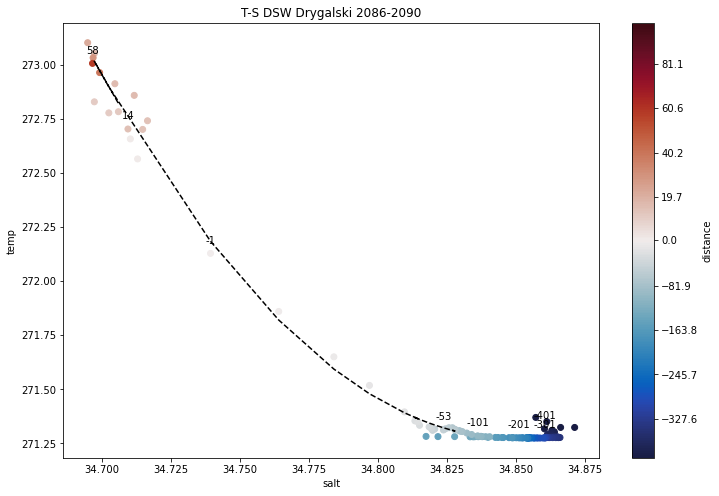

In [20]:
import matplotlib.colors as colors
TS1 = xr.merge([groupings_shelf_avsalt.sel(distance_bin = slice(-420,-0)).sel(z_bin = slice (400,4000)).mean('z_bin'),groupings_shelf_avtemp2.sel(z_bin = slice (400,4000)).sel(distance_bin = slice(-420,-0)).mean('z_bin'),
                   groupings_shelf_avage2.sel(z_bin = slice (400,4000)).sel(distance_bin = slice(-420,-0)).mean('z_bin')],compat='override')
TS2 = xr.merge([groupings_ext_avsalt.sel(z_bin = slice (400,4000)).mean('z_bin'),groupings_ext_avtemp2.sel(z_bin = slice (400,4000)).mean('z_bin')],compat='override')
TS3 = xr.merge([da_new_avsalt.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin'),da_new_avtemp.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin'),
                   da_new_avage.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin')],compat='override')

bounds = np.append(np.linspace(-400,0,128),np.linspace(0,100,128))
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.figure(figsize=(12,8))
xr.plot.scatter(TS1, x = 'histogram_z_distance', y = 'temp', hue = 'distance_bin', vmax = 100, vmin = -400, add_guide = False, norm = norm, cmap = 'cmo.balance')
    #xr.plot.scatter(TS2, x = 'histogram_z_distance', y = 'temp', hue = 'distance_bin', vmax = 200, vmin = -400, add_guide = False)
xr.plot.scatter(TS3, x = 'salt', y = 'temp', hue = 'distance', vmax = 100, vmin = -400, cmap = 'cmo.balance', norm = norm)
plt.title('T-S DSW Drygalski 2086-2090')
xs = np.append(TS1.histogram_z_distance.values,TS3.salt.values[44:])
ys = np.append(TS1.temp.values,TS3.temp.values[44:])
distancelist = np.append(TS1.distance_bin.values, TS3.distance.values[44:])



z = np.polyfit(xs, ys, 2)
p = np.poly1d(z)
plt.plot(xs[80:-10],p(xs)[80:-10],"k--")

for x,y,z in zip(xs[[4,27,50,73,-26,-14, -8,-1]],ys[[4,27,50,73,-26,-14, -8,-1]],distancelist[[4,27,50,73,-26,-14, -8,-1]]):
    label = "{:.0f}".format(z)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

I actually want to plot a selection of annual average points

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  ret

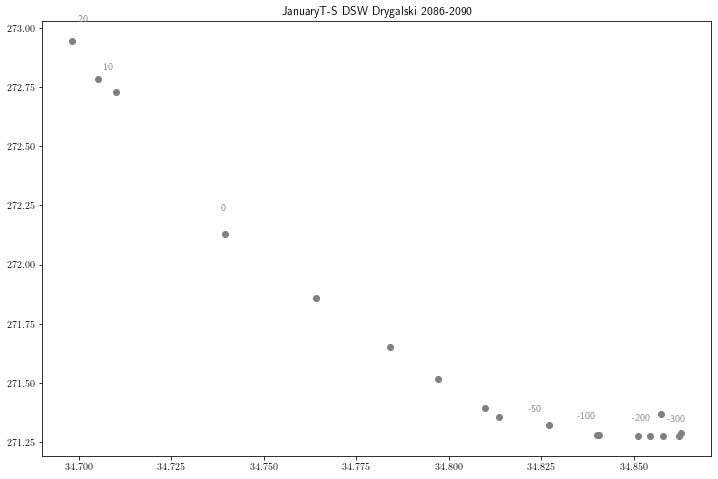

In [22]:



#bounds = np.append(np.linspace(-400,0,128),np.linspace(0,100,128))
#norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.figure(figsize=(12,8))
#xr.plot.scatter(TS1, x = 'histogram_z_distance', y = 'temp', vmax = 120, vmin = 0, color = '#4986ae') #other colors #6c49da
    #xr.plot.scatter(TS2, x = 'histogram_z_distance', y = 'temp', hue = 'distance_bin', vmax = 200, vmin = -400, add_guide = False)
#xr.plot.scatter(TS3, x = 'salt', y = 'temp', vmax = 120, vmin = 0, color = '#4986ae')#, norm = norm)
plt.title(Months[i]+'T-S DSW Drygalski 2086-2090')
xs = np.append(TS1.histogram_z_distance.values,TS3.salt.values[44:])
ys = np.append(TS1.temp.values,TS3.temp.values[44:])
distancelist = np.append(TS1.distance_bin.values, TS3.distance.values[44:])

xs2 = np.append(np.append(TS1.histogram_z_distance.values[0:-5:10],TS1.histogram_z_distance.values[-5:]),TS3.salt.values[44::5])
ys2 = np.append(np.append(TS1.temp.values[0:-5:10],TS1.temp.values[-5:]),TS3.temp.values[44::5])
plt.scatter(xs2,ys2, color = 'gray')
distancelist2 = np.append(np.append(TS1.distance_bin.values[0:-5:10],TS1.distance_bin.values[-5:]), TS3.distance.values[44::5])

specialvaluesdist = np.array([-300,-200,-100,-50,0,10,20])
specialvaluessalt = np.interp(specialvaluesdist,distancelist, xs)
specialvaluestemp =  np.interp(specialvaluesdist,distancelist, ys)


z = np.polyfit(xs, ys, 2)
#q = np.poly1d(z)
#plt.plot(xs[80:-10],q(xs)[80:-10],"k--")

for x,y,z in zip(specialvaluessalt,specialvaluestemp,specialvaluesdist):
    label = "{:.0f}".format(z)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,15), # distance from text to points (x,y)
                 ha='center', color = 'gray')

Developing a way to estimate the mixing (see report Methods section):

Define coordinates between AASW and CDW, define average positions of the vector I'm interested in, and then dotproduct them to see how similar the T-S evolution is to the direction of moving to CDW vs direction to AASW. That gives an approximate mixing fraction.

In [31]:
DilCDW = []
DilAASW = []
data = np.column_stack((xs,ys))

AASW = [34.6,271.25]
CDW = [34.7,273.15+1]

v_A = AASW-data[-14]
v_C = CDW - data[-14]
v_ST = np.mean(data[-13:-8],axis = 0)-data[-14]

v_A_hat = v_A/np.sqrt(np.dot(v_A,v_A))
v_C_hat = v_C/np.sqrt(np.dot(v_C,v_C))
v_ST_hat = v_ST/np.sqrt(np.dot(v_ST,v_ST))

DilCDW_i = 1-np.arccos(np.dot(v_C_hat,v_ST_hat))/np.arccos(np.dot(v_C_hat,v_A_hat))
DilAASW_i = 1-np.arccos(np.dot(v_A_hat,v_ST_hat))/np.arccos(np.dot(v_C_hat,v_A_hat))
#np.append(DilCDW,DilCDW_i)
#np.append(DilAASW,DilAASW_i)


The values: look pretty reasonable, as the annual average vector points towards CDW.

In [40]:
DilCDW_i

0.9897353415507758

In [41]:
DilAASW_i

0.010264658449222197

The following code creates T-S line plots for the Drygalski transect and also calculates the dilution numbers.

In [ ]:
plt.rc('text', usetex=True)
ds = section#.isel(time = 0)
ds1 = ds.where(ds.z > ds.ht-100)
ds1 = ds1.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > -72).where(ds.y < -69.5).where(ds.x < -186 ).where(ds.x > -188)
ds = ds.where(ds1 < 90)
ds = ds.where(ds.ht > 700)
ds = ds.assign(distance = lambda ds :(-ds.dzt*(np.sqrt(((ds.xt_ocean + 188)*10*(5556.065+ds.dxt)/2)**2+((ds.yt_ocean+60)*10*(5556.065+ds.dyt)/2)**2))/ds.dzt+615325)/1000)#.load()
ds = ds.where(ds.z > ds.ht -500)
sbins = np.linspace(0,122.136,70)
tbins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
dVol = ds.volume.where(~np.isnan(ds.volume))
hDV = histogram(ds.distance.where(~np.isnan(ds.volume)), ds.ht.where(~np.isnan(ds.volume)), bins = [sbins, tbins])#, weights = dVol)
bins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
h = histogram(hDV.ht_bin, bins=[bins], weights = hDV.distance_bin*hDV)/histogram(hDV.ht_bin, bins=[bins], weights = hDV)
p = h.values
j = np.zeros(p.size)
j[0] = p[0]
j[-1]=p[-1]
for i in np.arange(1, p.size - 1, 1):
    j[i]= np.mean(p[i-2:i+2])

htbins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
zbins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
DilCDW = []
DilAASW = []
for i in np.arange(12):

    #dsi = ds.isel(time = i)
    #i = 2
    dsi = ds.isel(time = [0*12+i, 1*12+i,2*12+i,3*12+i,4*12+i])
    dVol = dsi.volume.where(~np.isnan(dsi.v2))
    groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.v2.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

    da_new_av = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))})


    ds2i = ds2.isel(time = [0*12+i, 1*12+i,2*12+i,3*12+i,4*12+i])
    dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
    groupings_shelf_av = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.v2.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
    ds4i = ds4.isel(time = [0*12+i, 1*12+i,2*12+i,3*12+i,4*12+i])
    dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
    groupings_ext_av = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.v2.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
#newcmap = cmocean.cm.balance
# fig = plt.figure()
# # groupings_shelf_av.where(groupings_shelf_av > 0).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = -0.4, vmax = 0.4)
# # groupings_ext_av.where(groupings_ext_av > 0).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = -0.4, vmax = 0.4)
# # #groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
# # CS = da_new_av.where(da_new_av > 0).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = -0.4, vmax = 0.4, xlim = (-420,162), add_colorbar = False)
# # # plt.xlabel('Pseudodistance (km)', fontsize = 12)
# # # plt.ylabel('Cell depth (m)', fontsize = 12)
# # # plt.title(Months[0], fontsize = 12)
# # # cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
# # # cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
# # # cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
# # # cbar.ax.set_ylabel('velocity', fontsize = 12)

    mask_DSW3 = 2 * np.ones((len(da_new_av.z_bin), len(da_new_av.distance))) * np.isfinite(da_new_av.where(da_new_av > 0))  
    mask_notDSW3 = 1 * np.ones((len(da_new_av.z_bin), len(da_new_av.distance))) * np.isnan(da_new_av.where(da_new_av > 0)) 
    mask_DSW2 = 2 * np.ones((len(groupings_ext_av.z_bin), len(groupings_ext_av.distance_bin))) * np.isfinite(groupings_ext_av.where(groupings_ext_av > 0))  
    mask_notDSW2 = 1 * np.ones((len(groupings_ext_av.z_bin), len(groupings_ext_av.distance_bin))) * np.isnan(groupings_ext_av.where(groupings_ext_av > 0)) 
    mask_DSW1 = 2 * np.ones((len(groupings_shelf_av.z_bin), len(groupings_shelf_av.distance_bin))) * np.isfinite(groupings_shelf_av.where(groupings_shelf_av > 0))  
    mask_notDSW1 = 1 * np.ones((len(groupings_shelf_av.z_bin), len(groupings_shelf_av.distance_bin))) * np.isnan(groupings_shelf_av.where(groupings_shelf_av > 0)) 
    mask1 = mask_DSW1+mask_notDSW1
    mask2 = mask_DSW2+mask_notDSW2
    mask3 = mask_DSW3+mask_notDSW3

#_____________________________________________________________________________________________________________#

    dVol = dsi.volume.where(~np.isnan(dsi.v2))
    groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.temp.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

    da_new_avtemp = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))}, name ='temp')


    ds2i = ds2#.isel(time = 0)
    dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
    groupings_shelf_avtemp = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.temp.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
    ds4i = ds4#.isel(time = 0)
    dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
    groupings_ext_avtemp = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.temp.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
    newcmap = cmocean.cm.thermal
# fig = plt.figure()
# groupings_shelf_avtemp.where(mask1> 1).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 271, vmax = 274)
# groupings_ext_avtemp.where(mask2> 1).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 271, vmax = 274)
# #groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
# CStemp = da_new_av.where(mask3> 1).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = 271, vmax = 274, xlim = (-420,162), add_colorbar = False)
# plt.xlabel('Pseudodistance (km)', fontsize = 12)
# plt.ylabel('Cell depth (m)', fontsize = 12)
# plt.title(Months[0], fontsize = 12)
# cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
# cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
# cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
# cbar.ax.set_ylabel('temp', fontsize = 12)

#_____________________________________________________________________________________________________________#

    dVol = dsi.volume.where(~np.isnan(dsi.v2))
    groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.salt.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

    da_new_avsalt = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))}, name = 'salt')


    ds2i = ds2#.isel(time = 0)
    dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
    groupings_shelf_avsalt = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.salt.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
    ds4i = ds4#.isel(time = 0)
    dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
    groupings_ext_avsalt = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.salt.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
#newcmap = cmocean.cm.haline
# fig = plt.figure()
# groupings_shelf_avsalt.where(mask1> 1).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 34.64, vmax = 34.85)
# groupings_ext_avsalt.where(mask2> 1).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 34.64, vmax = 34.85)
# #groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
# CS = da_new_avsalt.where(mask3> 1).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = 34.64, vmax = 34.85, xlim = (-420,162), add_colorbar = False)
# plt.xlabel('Pseudodistance (km)', fontsize = 12)
# plt.ylabel('Cell depth (m)', fontsize = 12)
# plt.title(Months[0], fontsize = 12)
# cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
# cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
# cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
# cbar.ax.set_ylabel('salt', fontsize = 12)
#_____________________________________________________________________________________________________________#

    dVol = dsi.volume.where(~np.isnan(dsi.v2))
    groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.age_global.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

    da_new_avage = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))}, name = 'age')


    ds2i = ds2#.isel(time = 0)
    dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
    groupings_shelf_avage = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.age_global.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
    ds4i = ds4#.isel(time = 0)
    dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
    groupings_ext_avage = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.age_global.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
    #---------------------------------------------------------------------------------------------------------------#

    groupings_shelf_avtemp2 = xr.DataArray(groupings_shelf_avtemp.values, dims=['z_bin','distance_bin'],
                           coords={'z_bin': groupings_shelf_avtemp.z_bin,
                                   'distance_bin':groupings_shelf_avtemp.distance_bin}, name ='temp')
    groupings_ext_avtemp2 = xr.DataArray(groupings_ext_avtemp.values, dims=['z_bin','distance_bin'],
                           coords={'z_bin': groupings_ext_avtemp.z_bin,
                                   'distance_bin':groupings_ext_avtemp.distance_bin}, name ='temp')
    groupings_shelf_avage2 = xr.DataArray(groupings_shelf_avage.values, dims=['z_bin','distance_bin'],
                           coords={'z_bin': groupings_shelf_avage.z_bin,
                                   'distance_bin':groupings_shelf_avage.distance_bin}, name ='age')

    TS1 = xr.merge([groupings_shelf_avsalt.sel(distance_bin = slice(-420,-0)).sel(z_bin = slice (400,4000)).mean('z_bin'),groupings_shelf_avtemp2.sel(z_bin = slice (400,4000)).sel(distance_bin = slice(-420,-0)).mean('z_bin'),
                   groupings_shelf_avage2.sel(z_bin = slice (400,4000)).sel(distance_bin = slice(-420,-0)).mean('z_bin')],compat='override')
    TS2 = xr.merge([groupings_ext_avsalt.sel(z_bin = slice (400,4000)).mean('z_bin'),groupings_ext_avtemp2.sel(z_bin = slice (400,4000)).mean('z_bin')],compat='override')
    TS3 = xr.merge([da_new_avsalt.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin'),da_new_avtemp.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin'),
                   da_new_avage.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin')],compat='override')
    fig = plt.figure(figsize = (12,8))
    plt.scatter(xs2,ys2, color = 'gray')
    xr.plot.scatter(TS1, x = 'histogram_z_distance',y = 'temp',color = 'darkmagenta')#  hue = 'age', vmax = 120, vmin = 0, add_guide = False, cmap = 'cmo.dense')
    #xr.plot.scatter(TS2, x = 'histogram_z_distance', y = 'temp', hue = 'distance_bin', vmax = 200, vmin = -400, add_guide = False)
    xr.plot.scatter(TS3, x = 'salt', y = 'temp',color = 'darkmagenta')# hue = 'age', vmax = 120, vmin = 0, cmap = 'cmo.dense')#, norm = norm)
    
    xs = np.append(TS1.histogram_z_distance.values,TS3.salt.values[44:])
    ys = np.append(TS1.temp.values,TS3.temp.values[44:])
    distancelist = np.append(TS1.distance_bin.values, TS3.distance.values[44:])
    plt.title(Months[i]+' T-S DSW Drygalski 2086-2090')
    plt.xlabel('Practical Salinity (psu)')
    plt.ylabel('Temperature (K)')
    plt.xlim(34.65,34.95)
    plt.ylim(271.1,273.5)
    #qspace = np.linspace(34.67,34.84,20)
    #plt.plot(qspace,q(qspace),"k--")

    

    specialvaluesdist = np.array([-300,-200,-100,-50,0,10,20])
    specialvaluessalt = np.interp(specialvaluesdist,distancelist, xs)
    specialvaluestemp =  np.interp(specialvaluesdist,distancelist, ys)
    plt.scatter(specialvaluessalt,specialvaluestemp,color='darkmagenta')
    #z = np.polyfit(xs, ys, 2)
#q = np.poly1d(z)
#plt.plot(xs[80:-10],q(xs)[80:-10],"k--")

    for x,y,z in zip(specialvaluessalt,specialvaluestemp,specialvaluesdist):
        label = "{:.0f}".format(z)
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,15), # distance from text to points (x,y)
                 ha='center')

#     for x,y,z in zip(xs[[4,27,50,73,-26,-14, -8,-1]],ys[[4,27,50,73,-26,-14, -8,-1]],distancelist[[4,27,50,73,-26,-14, -8,-1]]):
#         label = "{:.0f}".format(z)
#         plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(5,15), # distance from text to points (x,y)
#                  ha='center')
    plt.savefig('TSpositive velocity19may'+str(i))
    fig.clf()
    AASW = [33.7,273.15-1.3]
    CDW = [34.7,273.15+1]
#    DilCDW = []
#    DilAASW = []
    data = np.column_stack((xs,ys))
#     for k in np.arange(20,109,1):
#         v_A = AASW - np.mean(data[k-20:k+20], axis = 0)
#         v_C = CDW - np.mean(data[k-20:k+20], axis = 0)
#         v_A_hat = v_A/np.sqrt(np.dot(v_A,v_A))
#         v_C_hat = v_C/np.sqrt(np.dot(v_C,v_C))
#         v_ST = np.mean(data[k-19:k+21],axis = 0)-np.mean(data[k-20:k+20],axis = 0)
#         v_ST_hat = v_ST/np.sqrt(np.dot(v_ST,v_ST))
#         DilCDW_i = 1-np.arccos(np.dot(v_C_hat,v_ST_hat))/np.arccos(np.dot(v_C_hat,v_A_hat))
#         #print(DilCDW_i)
#         #DilCDW_i = np.dot(v_C_hat,v_ST_hat)
#         DilCDW = np.append(DilCDW,DilCDW_i)
#         DilAASW_i = 1-np.arccos(np.dot(v_A_hat,v_ST_hat))/np.arccos(np.dot(v_C_hat,v_A_hat))
#         #DilAASW_i = np.dot(v_A_hat,v_ST_hat)
#         DilAASW = np.append(DilAASW,DilAASW_i)

#     DilCDW_av = []
#     DilAASW_av = []
#     for k in np.arange(2,len(DilCDW)-2):
#         DilCDW_av_i = np.mean(DilCDW[k-2:k+2])
#         DilAASW_av_i = np.mean(DilAASW[k-2:k+2])
#         DilCDW_av = np.append(DilCDW_av,DilCDW_av_i)
#         DilAASW_av = np.append(DilAASW_av,DilAASW_av_i)
#     fig = plt.figure(figsize = (12,8))
#     plt.title(Months[i]+' Drygalski 2086-2090 Dilution')
#     plt.scatter(distancelist[20:-5],DilCDW_av, color = 'r', label = 'CDW')
#     plt.scatter(distancelist[20:-5],DilAASW_av, label = 'AASW')
#     plt.xlabel('Distance (km)')
#     plt.ylabel('Mixing ratio')
#     plt.legend(loc = 'center left')
#     plt.ylim(0,1)
#     plt.savefig('DilutionDrygalskitest'+str(i))
#     fig.clf()

# AASW = [34.6,271.25]
# CDW = [34.7,273.15+1]
    v_A = AASW-data[-14]
    v_C = CDW - data[-14]
    v_ST = np.mean(data[-13:-8],axis = 0)-data[-14]
    v_A_hat = v_A/np.sqrt(np.dot(v_A,v_A))
    v_C_hat = v_C/np.sqrt(np.dot(v_C,v_C))
    v_ST_hat = v_ST/np.sqrt(np.dot(v_ST,v_ST))
    DilCDW_i = 1-np.arccos(np.dot(v_C_hat,v_ST_hat))/np.arccos(np.dot(v_C_hat,v_A_hat))
    DilAASW_i = 1-np.arccos(np.dot(v_A_hat,v_ST_hat))/np.arccos(np.dot(v_C_hat,v_A_hat))
    DilCDW = np.append(DilCDW,DilCDW_i)
    DilAASW = np.append(DilAASW,DilAASW_i)
    print(DilCDW)
    print(DilAASW)
    
    print(i)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=o

[0.98369839]
[0.01630161]
0


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  ret

[0.98369839 0.98949566]
[0.01630161 0.01050434]
1


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  ret

[0.98369839 0.98949566 0.99758522]
[0.01630161 0.01050434 0.00241478]
2


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  ret

[0.98369839 0.98949566 0.99758522 0.99675465]
[0.01630161 0.01050434 0.00241478 0.00324535]
3


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  ret

[0.98369839 0.98949566 0.99758522 0.99675465 0.99620189]
[0.01630161 0.01050434 0.00241478 0.00324535 0.00379811]
4


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  ret

The numbers from the dilution create this plot:

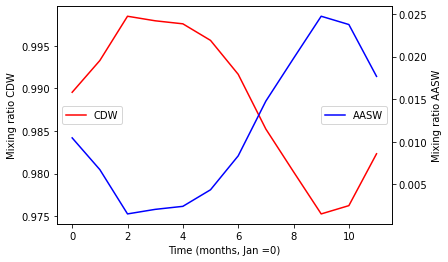

In [55]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time (months, Jan =0)')
ax1.set_ylabel('Mixing ratio CDW')
ax1.plot( np.arange(12),DilCDW,color='r', label = 'CDW')
plt.legend(loc = 'center left')
ax2 = ax1.twinx()
ax2.set_ylabel('Mixing ratio AASW')
ax2.plot(np.arange(12),DilAASW,color = 'b', label = 'AASW')

plt.legend(loc = 'center right')
fig.tight_layout
#fig.savefig('dilutionlooksfunnydrygalski')

Plotting two months so they can go in the report:

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=o

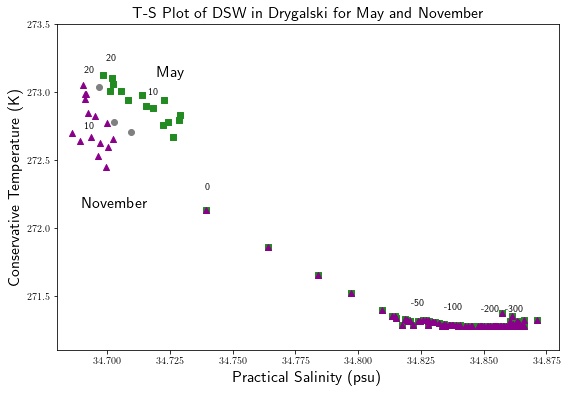

In [25]:
plt.rcParams['text.usetex'] = True
##TWO MONTHS 18 MAY

ds = section#.isel(time = 0)
ds1 = ds.where(ds.z > ds.ht-100)
ds1 = ds1.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > -72).where(ds.y < -69.5).where(ds.x < -186 ).where(ds.x > -188)
ds = ds.where(ds1 < 90)
ds = ds.where(ds.ht > 700)
ds = ds.assign(distance = lambda ds :(-ds.dzt*(np.sqrt(((ds.xt_ocean + 188)*10*(5556.065+ds.dxt)/2)**2+((ds.yt_ocean+60)*10*(5556.065+ds.dyt)/2)**2))/ds.dzt+615325)/1000)#.load()
ds = ds.where(ds.z > ds.ht -500)
sbins = np.linspace(0,122.136,70)
tbins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
dVol = ds.volume.where(~np.isnan(ds.volume))
hDV = histogram(ds.distance.where(~np.isnan(ds.volume)), ds.ht.where(~np.isnan(ds.volume)), bins = [sbins, tbins])#, weights = dVol)
bins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
h = histogram(hDV.ht_bin, bins=[bins], weights = hDV.distance_bin*hDV)/histogram(hDV.ht_bin, bins=[bins], weights = hDV)
p = h.values
j = np.zeros(p.size)
j[0] = p[0]
j[-1]=p[-1]
for i in np.arange(1, p.size - 1, 1):
    j[i]= np.mean(p[i-2:i+2])

htbins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
zbins = ds.sel(st_ocean = slice(0,5000)).st_ocean.values
DilCDW = []
DilAASW = []
#for i in np.arange(12):
i = 4
#dsi = ds.isel(time = i)

dsi = ds.isel(time = [0*12+i, 1*12+i,2*12+i,3*12+i,4*12+i])
dVol = dsi.volume.where(~np.isnan(dsi.v2))
groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.v2.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

da_new_av = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))})


ds2i = ds2.isel(time = [0*12+i, 1*12+i,2*12+i,3*12+i,4*12+i])
dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
groupings_shelf_av = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.v2.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
ds4i = ds4.isel(time = [0*12+i, 1*12+i,2*12+i,3*12+i,4*12+i])
dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
groupings_ext_av = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.v2.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
#newcmap = cmocean.cm.balance
# fig = plt.figure()
# # groupings_shelf_av.where(groupings_shelf_av > 0).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = -0.4, vmax = 0.4)
# # groupings_ext_av.where(groupings_ext_av > 0).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = -0.4, vmax = 0.4)
# # #groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
# # CS = da_new_av.where(da_new_av > 0).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = -0.4, vmax = 0.4, xlim = (-420,162), add_colorbar = False)
# # # plt.xlabel('Pseudodistance (km)', fontsize = 12)
# # # plt.ylabel('Cell depth (m)', fontsize = 12)
# # # plt.title(Months[0], fontsize = 12)
# # # cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
# # # cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
# # # cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
# # # cbar.ax.set_ylabel('velocity', fontsize = 12)

mask_DSW3 = 2 * np.ones((len(da_new_av.z_bin), len(da_new_av.distance))) * np.isfinite(da_new_av.where(da_new_av > 0))  
mask_notDSW3 = 1 * np.ones((len(da_new_av.z_bin), len(da_new_av.distance))) * np.isnan(da_new_av.where(da_new_av > 0)) 
mask_DSW2 = 2 * np.ones((len(groupings_ext_av.z_bin), len(groupings_ext_av.distance_bin))) * np.isfinite(groupings_ext_av.where(groupings_ext_av > 0))  
mask_notDSW2 = 1 * np.ones((len(groupings_ext_av.z_bin), len(groupings_ext_av.distance_bin))) * np.isnan(groupings_ext_av.where(groupings_ext_av > 0)) 
mask_DSW1 = 2 * np.ones((len(groupings_shelf_av.z_bin), len(groupings_shelf_av.distance_bin))) * np.isfinite(groupings_shelf_av.where(groupings_shelf_av > 0))  
mask_notDSW1 = 1 * np.ones((len(groupings_shelf_av.z_bin), len(groupings_shelf_av.distance_bin))) * np.isnan(groupings_shelf_av.where(groupings_shelf_av > 0)) 
mask1 = mask_DSW1+mask_notDSW1
mask2 = mask_DSW2+mask_notDSW2
mask3 = mask_DSW3+mask_notDSW3

#_____________________________________________________________________________________________________________#

dVol = dsi.volume.where(~np.isnan(dsi.v2))
groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.temp.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

da_new_avtemp = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))}, name ='temp')


ds2i = ds2#.isel(time = 0)
dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
groupings_shelf_avtemp = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.temp.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
ds4i = ds4#.isel(time = 0)
dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
groupings_ext_avtemp = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.temp.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
newcmap = cmocean.cm.thermal
# fig = plt.figure()
# groupings_shelf_avtemp.where(mask1> 1).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 271, vmax = 274)
# groupings_ext_avtemp.where(mask2> 1).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 271, vmax = 274)
# #groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
# CStemp = da_new_av.where(mask3> 1).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = 271, vmax = 274, xlim = (-420,162), add_colorbar = False)
# plt.xlabel('Pseudodistance (km)', fontsize = 12)
# plt.ylabel('Cell depth (m)', fontsize = 12)
# plt.title(Months[0], fontsize = 12)
# cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
# cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
# cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
# cbar.ax.set_ylabel('temp', fontsize = 12)

#_____________________________________________________________________________________________________________#

dVol = dsi.volume.where(~np.isnan(dsi.v2))
groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.salt.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

da_new_avsalt = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))}, name = 'salt')


ds2i = ds2#.isel(time = 0)
dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
groupings_shelf_avsalt = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.salt.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
ds4i = ds4#.isel(time = 0)
dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
groupings_ext_avsalt = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.salt.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
#newcmap = cmocean.cm.haline
# fig = plt.figure()
# groupings_shelf_avsalt.where(mask1> 1).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 34.64, vmax = 34.85)
# groupings_ext_avsalt.where(mask2> 1).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 34.64, vmax = 34.85)
# #groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
# CS = da_new_avsalt.where(mask3> 1).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = 34.64, vmax = 34.85, xlim = (-420,162), add_colorbar = False)
# plt.xlabel('Pseudodistance (km)', fontsize = 12)
# plt.ylabel('Cell depth (m)', fontsize = 12)
# plt.title(Months[0], fontsize = 12)
# cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
# cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
# cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
# cbar.ax.set_ylabel('salt', fontsize = 12)
#_____________________________________________________________________________________________________________#

#     dVol = dsi.volume.where(~np.isnan(dsi.v2))
#     groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
#                       weights = dsi.age_global.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
#                     dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
#                       weights = dVol)

#     da_new_avage = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
#                            coords={'z_bin': groupings.z_bin,
#                                    'distance':sorted(np.nan_to_num(j[0:58]))}, name = 'age')


#     ds2i = ds2#.isel(time = 0)
#     dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
#     groupings_shelf_avage = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
#                       weights = ds2i.age_global.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
#                     ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
#                       weights = dVol2)
#     ds4i = ds4#.isel(time = 0)
#     dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
#     groupings_ext_avage = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
#                       weights = ds4i.age_global.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
#                     ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
#                       weights = dVol4)
    #---------------------------------------------------------------------------------------------------------------#

groupings_shelf_avtemp2 = xr.DataArray(groupings_shelf_avtemp.values, dims=['z_bin','distance_bin'],
                           coords={'z_bin': groupings_shelf_avtemp.z_bin,
                                   'distance_bin':groupings_shelf_avtemp.distance_bin}, name ='temp')
groupings_ext_avtemp2 = xr.DataArray(groupings_ext_avtemp.values, dims=['z_bin','distance_bin'],
                           coords={'z_bin': groupings_ext_avtemp.z_bin,
                                   'distance_bin':groupings_ext_avtemp.distance_bin}, name ='temp')
# groupings_shelf_avage2 = xr.DataArray(groupings_shelf_avage.values, dims=['z_bin','distance_bin'],
#                            coords={'z_bin': groupings_shelf_avage.z_bin,
#                                    'distance_bin':groupings_shelf_avage.distance_bin}, name ='age')

TS1 = xr.merge([groupings_shelf_avsalt.sel(distance_bin = slice(-420,-0)).sel(z_bin = slice (400,4000)).mean('z_bin'),
                groupings_shelf_avtemp2.sel(z_bin = slice (400,4000)).sel(distance_bin = slice(-420,-0)).mean('z_bin'),],compat='override')
#TS2 = xr.merge([groupings_ext_avsalt.sel(z_bin = slice (400,4000)).mean('z_bin'),groupings_ext_avtemp2.sel(z_bin = slice (400,4000)).mean('z_bin')],compat='override')
TS3 = xr.merge([da_new_avsalt.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin'),
                da_new_avtemp.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin')],compat='override')
fig = plt.figure(figsize = (9,6))
plt.scatter(xs2,ys2, color = 'gray')
xr.plot.scatter(TS1, x = 'histogram_z_distance', y = 'temp', color = 'forestgreen', marker = "s")
#xr.plot.scatter(TS2, x = 'histogram_z_distance', y = 'temp', hue = 'distance_bin', vmax = 200, vmin = -400, add_guide = False)
xr.plot.scatter(TS3, x = 'salt', y = 'temp', color = 'forestgreen', marker = "s")#, norm = norm)
    
xs = np.append(TS1.histogram_z_distance.values,TS3.salt.values[44:])
ys = np.append(TS1.temp.values,TS3.temp.values[44:])
distancelist = np.append(TS1.distance_bin.values, TS3.distance.values[44:])
#plt.title(Months[i]+' T-S DSW Drygalski 2086-2090')
#plt.xlabel('Practical Salinity (psu)')
#plt.ylabel('Temperature (K)')
#plt.xlim(34.65,34.95)
#plt.ylim(271.1,273.5)
    #qspace = np.linspace(34.67,34.84,20)
    #plt.plot(qspace,q(qspace),"k--")

    

specialvaluesdist = np.array([-300,-200,-100,-50,0,10,20])
specialvaluessalt = np.interp(specialvaluesdist,distancelist, xs)
specialvaluestemp =  np.interp(specialvaluesdist,distancelist, ys)
    #z = np.polyfit(xs, ys, 2)
#q = np.poly1d(z)
#plt.plot(xs[80:-10],q(xs)[80:-10],"k--")

for x,y,z in zip(specialvaluessalt,specialvaluestemp,specialvaluesdist):
    label = "{:.0f}".format(z)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,15), # distance from text to points (x,y)
                 ha='center')

i = 10
#dsi = ds.isel(time = i)

dsi = ds.isel(time = [0*12+i, 1*12+i,2*12+i,3*12+i,4*12+i])
dVol = dsi.volume.where(~np.isnan(dsi.v2))
groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.v2.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

da_new_av = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))})


ds2i = ds2.isel(time = [0*12+i, 1*12+i,2*12+i,3*12+i,4*12+i])
dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
groupings_shelf_av = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.v2.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
ds4i = ds4.isel(time = [0*12+i, 1*12+i,2*12+i,3*12+i,4*12+i])
dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
groupings_ext_av = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.v2.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
#newcmap = cmocean.cm.balance
# fig = plt.figure()
# # groupings_shelf_av.where(groupings_shelf_av > 0).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = -0.4, vmax = 0.4)
# # groupings_ext_av.where(groupings_ext_av > 0).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = -0.4, vmax = 0.4)
# # #groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
# # CS = da_new_av.where(da_new_av > 0).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = -0.4, vmax = 0.4, xlim = (-420,162), add_colorbar = False)
# # # plt.xlabel('Pseudodistance (km)', fontsize = 12)
# # # plt.ylabel('Cell depth (m)', fontsize = 12)
# # # plt.title(Months[0], fontsize = 12)
# # # cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
# # # cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
# # # cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
# # # cbar.ax.set_ylabel('velocity', fontsize = 12)

mask_DSW3 = 2 * np.ones((len(da_new_av.z_bin), len(da_new_av.distance))) * np.isfinite(da_new_av.where(da_new_av > 0))  
mask_notDSW3 = 1 * np.ones((len(da_new_av.z_bin), len(da_new_av.distance))) * np.isnan(da_new_av.where(da_new_av > 0)) 
mask_DSW2 = 2 * np.ones((len(groupings_ext_av.z_bin), len(groupings_ext_av.distance_bin))) * np.isfinite(groupings_ext_av.where(groupings_ext_av > 0))  
mask_notDSW2 = 1 * np.ones((len(groupings_ext_av.z_bin), len(groupings_ext_av.distance_bin))) * np.isnan(groupings_ext_av.where(groupings_ext_av > 0)) 
mask_DSW1 = 2 * np.ones((len(groupings_shelf_av.z_bin), len(groupings_shelf_av.distance_bin))) * np.isfinite(groupings_shelf_av.where(groupings_shelf_av > 0))  
mask_notDSW1 = 1 * np.ones((len(groupings_shelf_av.z_bin), len(groupings_shelf_av.distance_bin))) * np.isnan(groupings_shelf_av.where(groupings_shelf_av > 0)) 
mask1 = mask_DSW1+mask_notDSW1
mask2 = mask_DSW2+mask_notDSW2
mask3 = mask_DSW3+mask_notDSW3

#_____________________________________________________________________________________________________________#

dVol = dsi.volume.where(~np.isnan(dsi.v2))
groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.temp.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

da_new_avtemp = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))}, name ='temp')


ds2i = ds2#.isel(time = 0)
dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
groupings_shelf_avtemp = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.temp.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
ds4i = ds4#.isel(time = 0)
dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
groupings_ext_avtemp = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.temp.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
newcmap = cmocean.cm.thermal
# fig = plt.figure()
# groupings_shelf_avtemp.where(mask1> 1).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 271, vmax = 274)
# groupings_ext_avtemp.where(mask2> 1).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 271, vmax = 274)
# #groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
# CStemp = da_new_av.where(mask3> 1).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = 271, vmax = 274, xlim = (-420,162), add_colorbar = False)
# plt.xlabel('Pseudodistance (km)', fontsize = 12)
# plt.ylabel('Cell depth (m)', fontsize = 12)
# plt.title(Months[0], fontsize = 12)
# cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
# cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
# cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
# cbar.ax.set_ylabel('temp', fontsize = 12)

#_____________________________________________________________________________________________________________#

dVol = dsi.volume.where(~np.isnan(dsi.v2))
groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dsi.salt.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
                    dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
                      weights = dVol)

da_new_avsalt = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
                           coords={'z_bin': groupings.z_bin,
                                   'distance':sorted(np.nan_to_num(j[0:58]))}, name = 'salt')


ds2i = ds2#.isel(time = 0)
dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
groupings_shelf_avsalt = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = ds2i.salt.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
                    ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
                      weights = dVol2)
ds4i = ds4#.isel(time = 0)
dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
groupings_ext_avsalt = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = ds4i.salt.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
                    ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
                      weights = dVol4)
#newcmap = cmocean.cm.haline
# fig = plt.figure()
# groupings_shelf_avsalt.where(mask1> 1).sel(distance_bin = slice(-420,-0)).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 34.64, vmax = 34.85)
# groupings_ext_avsalt.where(mask2> 1).plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmin = 34.64, vmax = 34.85)
# #groupings_con.plot(cmap = newcmap, ylim = (4000,0), add_colorbar = False, vmax = 120)#.sel(distance_bin = slice(-20000,10))
# CS = da_new_avsalt.where(mask3> 1).sel(distance = slice(0, 70.500)).plot(cmap = newcmap,  ylim = (4000,0), vmin = 34.64, vmax = 34.85, xlim = (-420,162), add_colorbar = False)
# plt.xlabel('Pseudodistance (km)', fontsize = 12)
# plt.ylabel('Cell depth (m)', fontsize = 12)
# plt.title(Months[0], fontsize = 12)
# cb_ax = fig.add_axes([0.9, 0.05, 0.01, 0.9])
# cbar = fig.colorbar(CS, cax=cb_ax, cmap = newcmap)
# cbar.set_ticks(np.arange(-0.4, 0.4, 0.1))
# cbar.ax.set_ylabel('salt', fontsize = 12)
#_____________________________________________________________________________________________________________#

#     dVol = dsi.volume.where(~np.isnan(dsi.v2))
#     groupings = histogram(dsi.z.where(~np.isnan(dsi.v2)), dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
#                       weights = dsi.age_global.where(~np.isnan(dsi.v2))*dVol)/histogram(dsi.z.where(~np.isnan(dsi.v2)), 
#                     dsi.ht.where(~np.isnan(dsi.v2)), bins = [zbins, htbins],
#                       weights = dVol)

#     da_new_avage = xr.DataArray(groupings.sel(ht_bin = slice(0,2700)).values, dims=['z_bin','distance'],
#                            coords={'z_bin': groupings.z_bin,
#                                    'distance':sorted(np.nan_to_num(j[0:58]))}, name = 'age')


#     ds2i = ds2#.isel(time = 0)
#     dVol2 = ds2i.volume.where(~np.isnan(ds2i.v2))
#     groupings_shelf_avage = histogram(ds2i.z.where(~np.isnan(ds2i.v2)), ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
#                       weights = ds2i.age_global.where(~np.isnan(ds2i.v2))*dVol2)/histogram(ds2i.z.where(~np.isnan(ds2i.v2)), 
#                     ds2i.distance.where(~np.isnan(ds2i.v2)), bins = [zbins_shelf, distancebins_shelf],
#                       weights = dVol2)
#     ds4i = ds4#.isel(time = 0)
#     dVol4 = ds4i.volume.where(~np.isnan(ds4i.v2))
#     groupings_ext_avage = histogram(ds4i.z.where(~np.isnan(ds4i.v2)), ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
#                       weights = ds4i.age_global.where(~np.isnan(ds4i.v2))*dVol4)/histogram(ds4i.z.where(~np.isnan(ds4i.v2)), 
#                     ds4i.distance.where(~np.isnan(ds4i.v2)), bins = [zbins_ext, distancebins_ext],
#                       weights = dVol4)
    #---------------------------------------------------------------------------------------------------------------#

groupings_shelf_avtemp2 = xr.DataArray(groupings_shelf_avtemp.values, dims=['z_bin','distance_bin'],
                           coords={'z_bin': groupings_shelf_avtemp.z_bin,
                                   'distance_bin':groupings_shelf_avtemp.distance_bin}, name ='temp')
groupings_ext_avtemp2 = xr.DataArray(groupings_ext_avtemp.values, dims=['z_bin','distance_bin'],
                           coords={'z_bin': groupings_ext_avtemp.z_bin,
                                   'distance_bin':groupings_ext_avtemp.distance_bin}, name ='temp')
# groupings_shelf_avage2 = xr.DataArray(groupings_shelf_avage.values, dims=['z_bin','distance_bin'],
#                            coords={'z_bin': groupings_shelf_avage.z_bin,
#                                    'distance_bin':groupings_shelf_avage.distance_bin}, name ='age')

TS1 = xr.merge([groupings_shelf_avsalt.sel(distance_bin = slice(-420,-0)).sel(z_bin = slice (400,4000)).mean('z_bin'),
                groupings_shelf_avtemp2.sel(z_bin = slice (400,4000)).sel(distance_bin = slice(-420,-0)).mean('z_bin'),],compat='override')
#TS2 = xr.merge([groupings_ext_avsalt.sel(z_bin = slice (400,4000)).mean('z_bin'),groupings_ext_avtemp2.sel(z_bin = slice (400,4000)).mean('z_bin')],compat='override')
TS3 = xr.merge([da_new_avsalt.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin'),
                da_new_avtemp.sel(distance = slice(0, 70.500)).sel(z_bin = slice (400,4000)).mean('z_bin')],compat='override')
#fig = plt.figure(figsize = (12,8))
#plt.scatter(xs2,ys2, color = 'gray')
xr.plot.scatter(TS1, x = 'histogram_z_distance', y = 'temp', color = 'darkmagenta', marker = "^")
#xr.plot.scatter(TS2, x = 'histogram_z_distance', y = 'temp', hue = 'distance_bin', vmax = 200, vmin = -400, add_guide = False)
xr.plot.scatter(TS3, x = 'salt', y = 'temp', color = 'darkmagenta',marker = "^")#, norm = norm)
    
xs = np.append(TS1.histogram_z_distance.values,TS3.salt.values[44:])
ys = np.append(TS1.temp.values,TS3.temp.values[44:])
distancelist = np.append(TS1.distance_bin.values, TS3.distance.values[44:])
plt.title('T-S Plot of DSW in Drygalski for May and November', fontsize = 16)
plt.xlabel('Practical Salinity (psu)', fontsize = 16)
plt.ylabel('Conservative Temperature (K)', fontsize = 16)
plt.xlim(34.68,34.88)
plt.ylim(271.1,273.5)
    #qspace = np.linspace(34.67,34.84,20)
    #plt.plot(qspace,q(qspace),"k--")

    

specialvaluesdist = np.array([10,20])
specialvaluessalt = np.interp(specialvaluesdist,distancelist, xs)
specialvaluestemp =  np.interp(specialvaluesdist,distancelist, ys)
    #z = np.polyfit(xs, ys, 2)
#q = np.poly1d(z)
#plt.plot(xs[80:-10],q(xs)[80:-10],"k--")

for x,y,z in zip(specialvaluessalt,specialvaluestemp,specialvaluesdist):
    label = "{:.0f}".format(z)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,15), # distance from text to points (x,y)
                 ha='center')
plt.text(0.2, 0.85, 'May', {'color': 'k', 'fontsize': 16},
         horizontalalignment='left',
         verticalalignment='center',
         rotation=0,
         clip_on=False,
         transform=plt.gca().transAxes)
plt.text(0.05, 0.45, 'November', {'color': 'k', 'fontsize': 16},
         horizontalalignment='left',
         verticalalignment='center',
         rotation=0,
         clip_on=False,
         transform=plt.gca().transAxes)
fig.savefig('2TimesDrygTSLIne')